### Amr Shawki 1001990

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [2]:
# Reading CSV File
dataset = pd.read_csv("./customers.csv")
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


So for the first step of this assignment. I chose to have 3 research questions as my data analysis and visualized the results. Above each cell that contains the logic for each question, there will be an explanation of the steps taken. The research questions are:

- Research Question 1: What is the gender breakdown of the dataset?
- Research Question 2: What age groups have the highest spending score?
- Research Question 3: Based on the result from question 2, How is the annual income correlated with the spending score of each group (positive or negative correlation)


### Research Question 1
In the first question, we check the gender breakdown of males to females and plot the data using seaborn library. Simple enough so moving on to the next question.

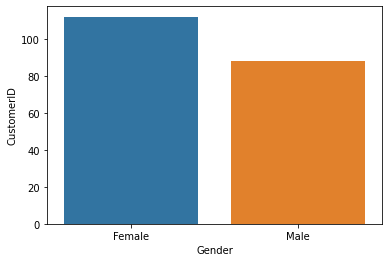

In [3]:
# Research Question 1: What is the gender breakdown of the dataset?

gender_breakdown = dataset[['Gender', 'CustomerID']].groupby('Gender').count().reset_index() # reset_index()
ax = sns.barplot(x='Gender', y='CustomerID', data=gender_breakdown)
display(ax)

### Research Question 2
In this question, we are exploring what age groups have the highest amount of spending. To determine this, we figure out the max age, create bins based on this max age ( 3 in our case ) and then use those bins with the "Groupby" method to find the max spending per bin which would give us the highest spending per age bin.

Max Age is:  70


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Bins
0,1,Male,19,15,39,"(0, 25]"
1,2,Male,21,15,81,"(0, 25]"
2,3,Female,20,16,6,"(0, 25]"
3,4,Female,23,16,77,"(0, 25]"
4,5,Female,31,17,40,"(25, 50]"


,Bins,Spending Score (1-100)
0,"(0, 25]",94
1,"(25, 50]",99
2,"(50, 75]",60


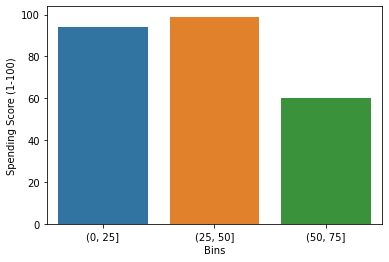

In [4]:
# Research Question 2: What age groups have the highest spending score?

# Determine max age to use for binning
max_age = dataset[['Age']].max().values[0] # added vales[0] to get only the age value and print it beside string ( looks better )
print("Max Age is: ", max_age)

# bin ages to 3 groups [0 -> 25 | 25 -> 50 | 50 -> 75]
bins = [0, 25, 50, 75]
dataset['Bins'] = pd.cut(dataset['Age'], bins=bins)
display(dataset.head(5))

# Find max spending score per bin and compare them
max_score = dataset[['Spending Score (1-100)', 'Bins']].groupby('Bins').max().reset_index()
display(max_score)

# Visualize result
bar_plot = sns.barplot(data=max_score, x="Bins", y="Spending Score (1-100)")
bar_plot

### Research Question 3
In this research question, we're seeing if there is a correlation between the spending habits of the binned age groups vs their income level. We get the averge spending per age bin and then visualize this data using a scatterplot. The scatterplot shows us that there is some pattern between annual income and spending habits.

,Bins,Annual Income (k$)
0,"(0, 25]",45.684211
1,"(25, 50]",67.393443
2,"(50, 75]",53.850000


,Bins,Annual Income (k$),SpendingScore
0,"(0, 25]",45.684211,94
1,"(25, 50]",67.393443,99
2,"(50, 75]",53.850000,60


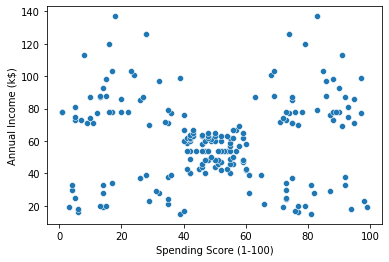

In [5]:
# Research Question 3: Based on the result from question 2, 
# How is the annual income correlated with the spending score of each group (positive or negative correlation)

# Find Average annual income based on binned ages
avg_income = dataset[['Bins', 'Annual Income (k$)']].groupby(['Bins']).mean().reset_index()
display(avg_income)

# Merge max_score to avg_income
avg_income['SpendingScore'] = max_score['Spending Score (1-100)']
display(avg_income)

# Visualize Data
sns.scatterplot(data=dataset, x="Spending Score (1-100)", y="Annual Income (k$)")

### K means clustering & Visualization
We'll be building a model to segment the customers into multiple segements and then visualize the data using a 3D Scatter plot.

We first started by deciding which features we'll be using for our clustering and I ended up choosing the 3 numerical features that we have (age, annualIncome, spendingScore ). 

We then needed to pick the best k for our k means algorithm so we ended up creating a elbow graph (graph used to get best k) and chose 5 as our value because it seemed like a good point where the WSS stops decreasing.

After that we do our model by feeding the data to the scipy k means algorithm and visualize the data in a 3d manner with plotly library.

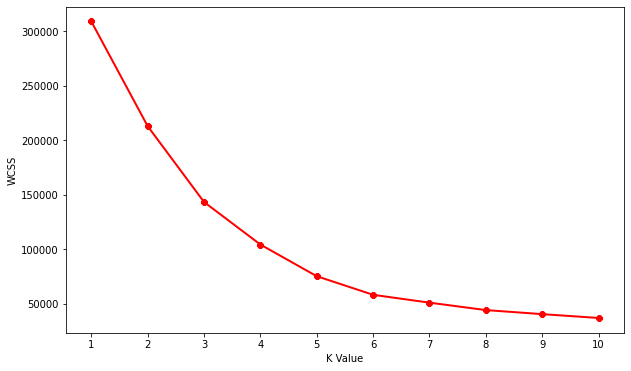

In [6]:
#Taking the features
X=dataset[["Age","Annual Income (k$)","Spending Score (1-100)"]]
df = dataset[["CustomerID", "Gender", "Age","Annual Income (k$)","Spending Score (1-100)"]]

# Finding the best K by calculating the Sum of Squared Errors (WSS)
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualizing the data
plt.figure(figsize=(10,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [7]:
# We choose the k where (WSS) starts to diminish

km = KMeans(n_clusters=5)
y = km.fit_predict(X)

df["label"] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [8]:
# 3D Visualization of the clusters [Age, AnnualSpending, SpendingScore]
 
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label'], 
        size= 10,
        line=dict(
            color= df['label'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= '3D clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)